In [1]:
from tdmclient import ClientAsync
from local_navigation import localNavigation
from global_navigation import GlobalNavigation
from Vision import Vision
import time
from motion_control import MotionControl
from robot_api import Thymio
from global_navigation import GlobalNavigation
import numpy as np

client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node d39ca52c-6d75-449e-96ee-13586c1312f5

In [11]:
# await node.unlock()

{'error_code': 2}

In [2]:
#create vision module object
visio = Vision()
visio.begin()

Caméra initialisée sur le port 4


Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected


Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected


In [5]:
# visio.stop() #stop the visio module
# t, g, o = visio.get_thymio_goal_and_obstacles() #get the lists you need
# print(o)
# print(g)
# print(t)

In [3]:
"""Point d'entrée principal"""
global_nav = GlobalNavigation()
Thymio = Thymio(node, client)
motion_control = MotionControl(Thymio)
local_navigation = localNavigation()



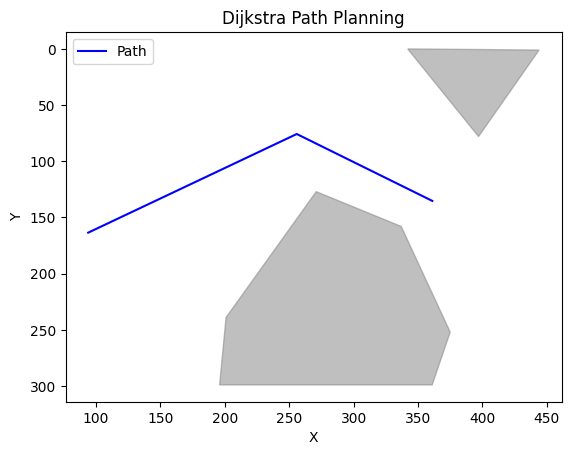

In [5]:
thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()

path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
visio.camera_feed.analysis.path = path.copy()
if path:
    global_nav.plot_path(path, obstacles)
else:
    print("No valid path found. Cannot plot.")

In [ ]:
# print(path)

[(496.3852233886719, 259.9727783203125), (255.91594120355137, 77.24171886163667), (75.70690155029297, 167.85345458984375)]


(get_2_markers) Goal not detected
Goal not detected


In [6]:
path.pop(0)
goal_point = path[0]
glob_loc = 0
speed = [0,0]

try:
    while True:
        prox_horizontal = motion_control.read_prox_sensors()
        glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
        #print(prox_horizontal)
       
        if(glob_loc == 0):
            glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
            if motion_control.path_tracking(thymio, goal_point):
                path.pop(0)
                if not path:
                    motion_control.set_motor_speed(0, 0)
                    break
                else:
                    goal_point = path[0]
            thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
        if(glob_loc == 1):
            y = motion_control.get_motor_speed()
            speed = local_navigation.reactive_control(prox_horizontal, y)
            motion_control.set_motor_speed(speed[0], speed[1])
            glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
            if(glob_loc == 0):
                thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
                path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
    print("ARRIVED")



except KeyboardInterrupt:
    print("Stop the program")
finally:
    visio.stop()
    print("Program stops")

vitesse lineaire finale 4835.2207
vitesse angulaire finale 4835.2207
vitesse lineaire finale 4800.4487
vitesse angulaire finale 4800.4487
vitesse lineaire finale 4788.543
vitesse angulaire finale 4788.543
vitesse lineaire finale 4803.689
vitesse angulaire finale 4803.689
vitesse lineaire finale 4759.4087
vitesse angulaire finale 4759.4087
vitesse lineaire finale 4640.296
vitesse angulaire finale 4640.296
vitesse lineaire finale 4559.614
vitesse angulaire finale 4559.614
vitesse lineaire finale 4542.7256
vitesse angulaire finale 4542.7256
vitesse lineaire finale 4497.935
vitesse angulaire finale 4497.935
vitesse lineaire finale 4371.0586
vitesse angulaire finale 4371.0586
vitesse lineaire finale 4286.5425
vitesse angulaire finale 4286.5425
vitesse lineaire finale 4256.4067
vitesse angulaire finale 4256.4067
vitesse lineaire finale 4220.9897
vitesse angulaire finale 4220.9897
vitesse lineaire finale 4168.7837
vitesse angulaire finale 4168.7837
vitesse lineaire finale 4231.7715
vitesse an

In [6]:
motion_control.set_motor_speed(0, 0)
#test

In [ ]:
prox_horizontal = motion_control.read_prox_sensors()
print(prox_horizontal)

[0, 0, 0, 0, 0, 0, 0]
